<a href="https://colab.research.google.com/github/Vishwaschole/sample-store-data-analysis/blob/main/sparksfoundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#      **THE SPARKS FOUNDATION- INTERNSHIP**

Graduate Rotational internship program

**Data science & business Analytics** 

**Author: vishwas namdev chole**

## **Topic**:**EDA on sample super store data set**

In [ ]:
# Import all the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objects as go
import missingno as msno

In [ ]:
# Give path to access the data
# Read files using pandas modules
file_path='/content/drive/MyDrive/SampleSuperstore.csv'
sample_store=pd.read_csv(file_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the first five rows in the data
sample_store.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#Read the last five rows of the data
sample_store.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# **Understand the Data** 

In [ ]:
# Check the information in the data
sample_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
# Try to find duplicate value from data set
# By some condition
sample_store.duplicated().sum()

17

In [ ]:
sample_store.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
#Here we dropped all duplicate values
sample_store.duplicated().sum()


0

In [ ]:
# Let manipulate data set
sample_store.shape

(9977, 13)

In [ ]:
#Check the shape of the data
sample_store.shape

(9977, 13)

In [ ]:
#Look for the number of unique Apps
sample_store['Ship Mode'].nunique()

4

In [ ]:
sample_store['Ship Mode'].unique()



array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
sample_store['Country'].nunique()


1

In [ ]:
sample_store['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
# Trying to see is Null values in dataset
sample_store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
# Gatering information of data
print(sample_store.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB
None


In [ ]:
sample_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [ ]:
#check unique value of each column
sample_store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

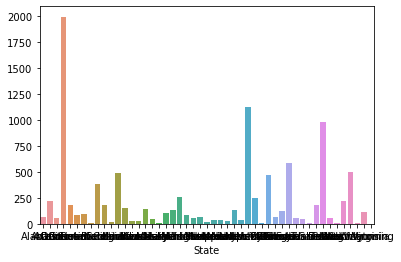

In [ ]:
#data visualization on state Vs profit
fresh_data=sample_store.groupby('State')['Profit'].size()
sns.barplot(x=fresh_data.index,y=fresh_data.values)

# ***Find the correlation of dataset*** 

In [ ]:
sample_store.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [ ]:
sample_store.value_counts()

Ship Mode       Segment      Country        City           State       Postal Code  Region   Category         Sub-Category  Sales     Quantity  Discount  Profit   
Standard Class  Home Office  United States  Yuma           Arizona     85364        West     Technology       Machines      599.985   5         0.7       -479.9880    1
Second Class    Corporate    United States  Laredo         Texas       78041        Central  Office Supplies  Binders       2.286     3         0.8       -3.6576      1
                                            Little Rock    Arkansas    72209        South    Office Supplies  Envelopes     182.940   3         0.0        85.9818     1
                                            Las Vegas      Nevada      89115        West     Office Supplies  Paper         97.880    2         0.0        48.9400     1
                                                                                                                            32.400    5         0.0        15.87

In [ ]:
col=['Postal Code']
data=sample_store.drop(columns=col,axis=1)

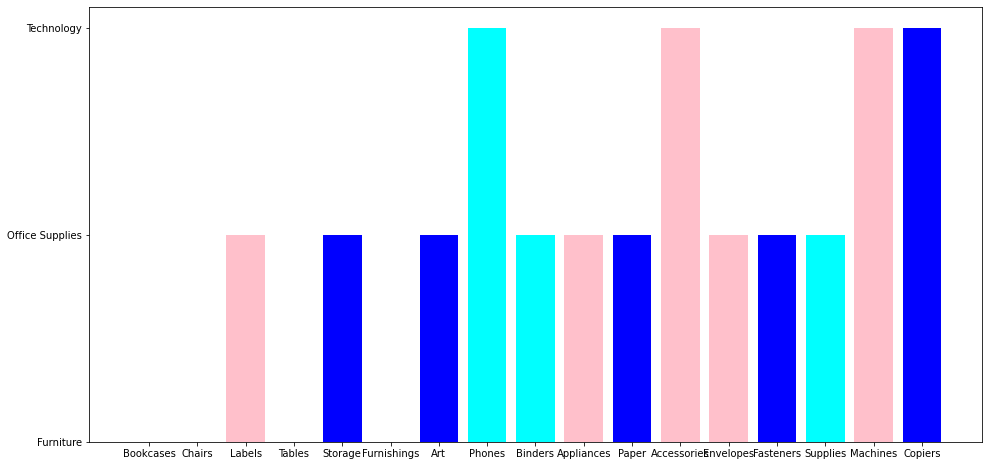

In [ ]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=sample_store,color=['blue', 'pink','cyan'])

plt.show()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

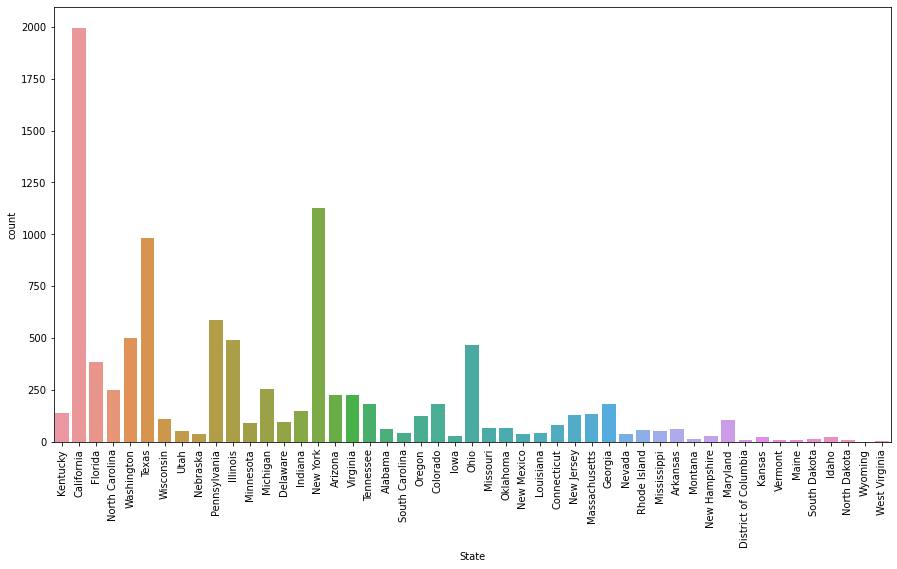

In [ ]:
# state with number of count
print(data['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()


Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


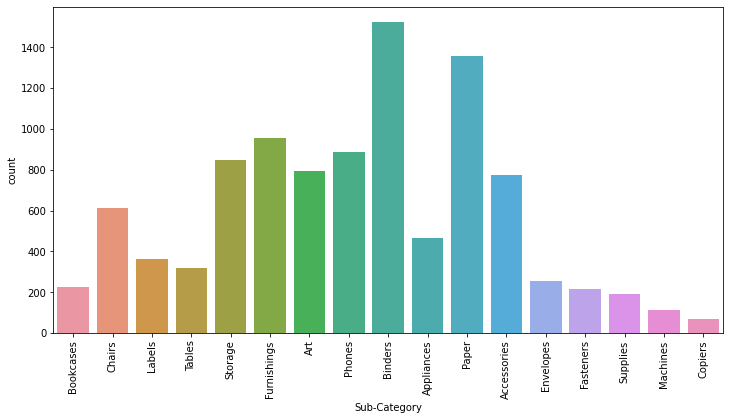

In [ ]:
print(data['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

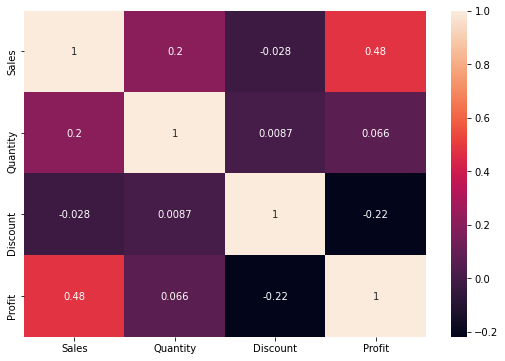

In [ ]:
# Heat map for relation
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(data.corr(), annot= True)
plt.show()

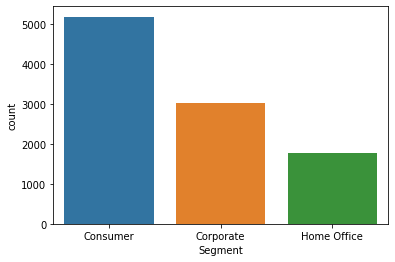

In [ ]:
#segment with count
sns.countplot(x=data['Segment'])

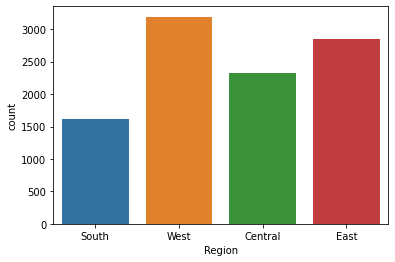

In [ ]:
#Region with count value
sns.countplot(x=data['Region'])

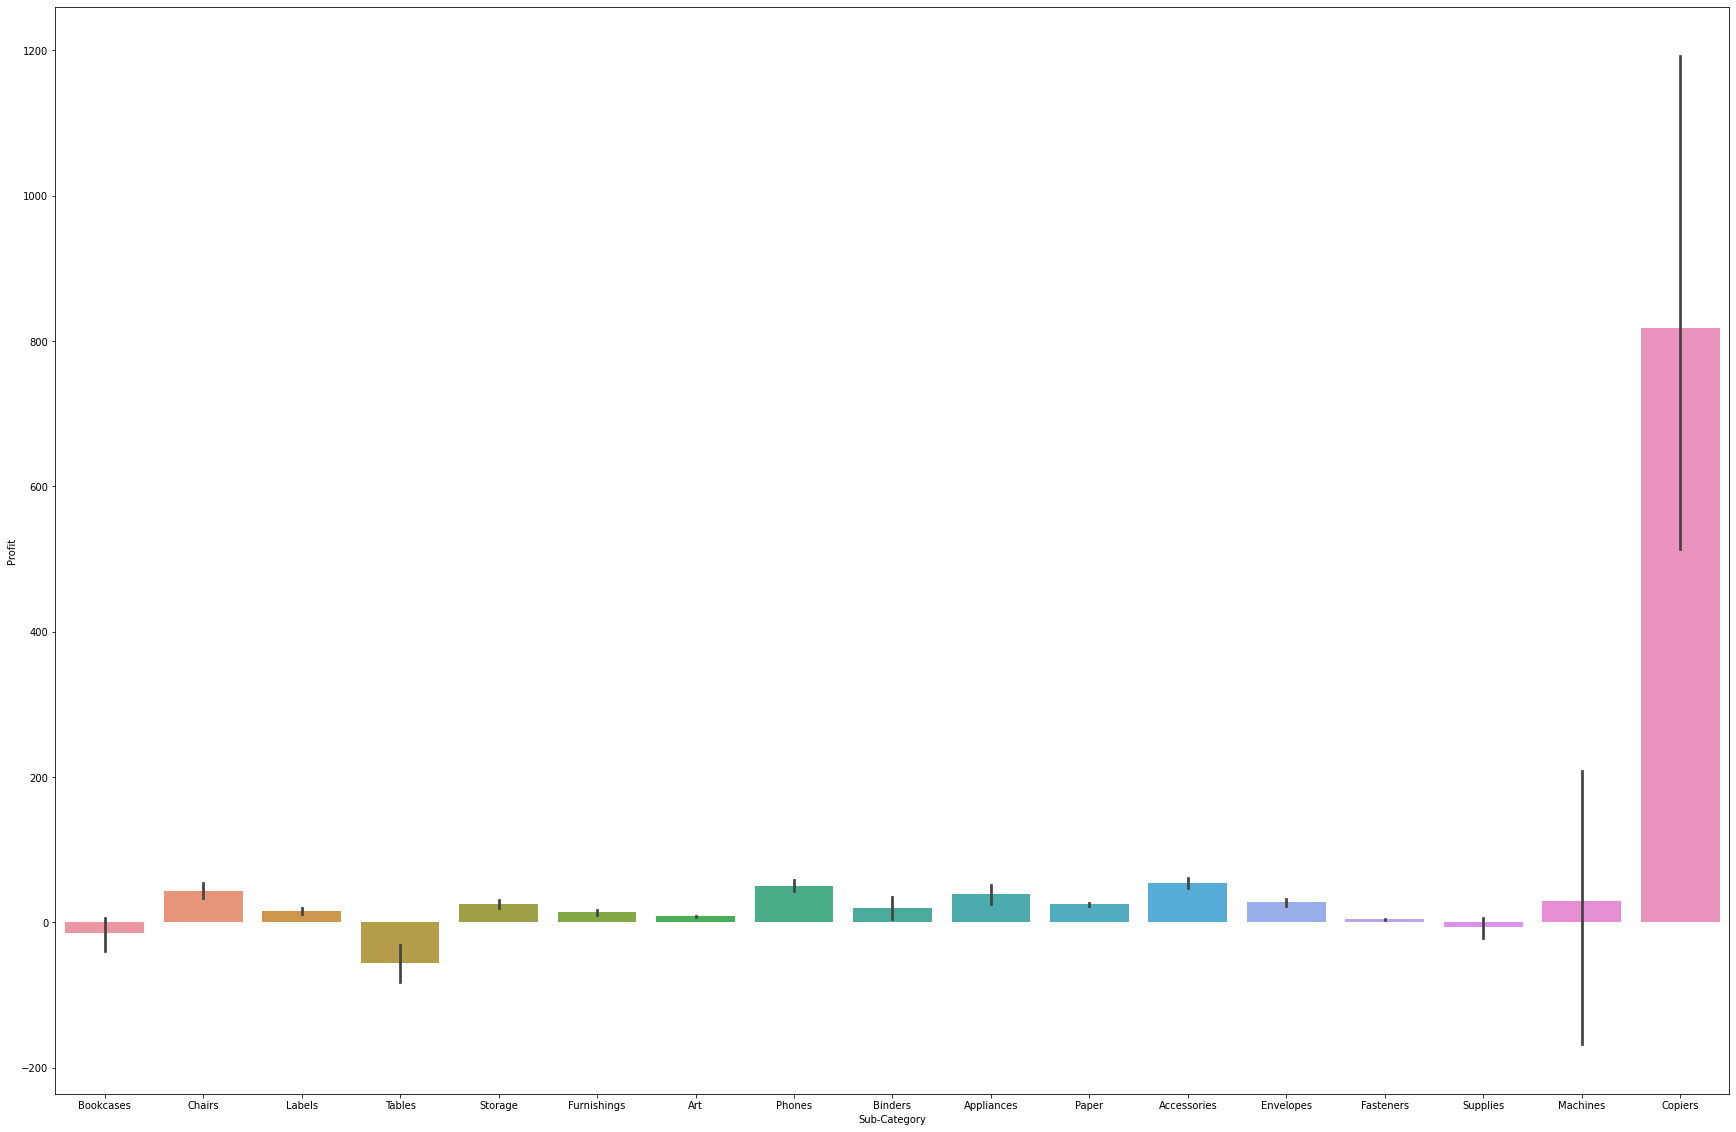

In [ ]:
# profit for different Category
plt.figure(figsize=(30,20))
sns.barplot(x=data['Sub-Category'], y=data['Profit'])

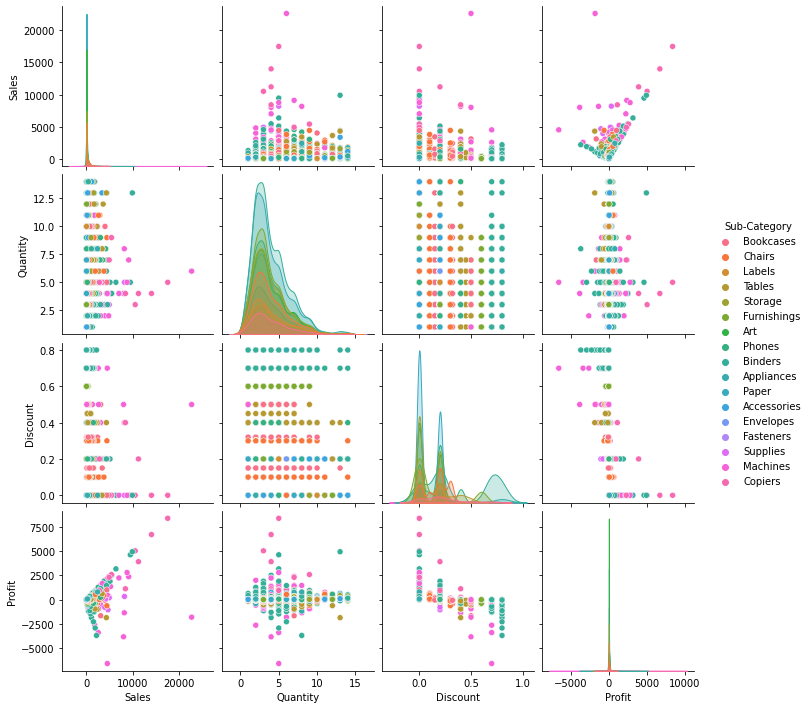

In [ ]:
figsize=(15,10)
sns.pairplot(data,hue='Sub-Category')

In [ ]:
profit=data.iloc[:,11:12]

In [ ]:
profit.sort_values

<bound method DataFrame.sort_values of         Profit
0      41.9136
1     219.5820
2       6.8714
3    -383.0310
4       2.5164
...        ...
9989    4.1028
9990   15.6332
9991   19.3932
9992   13.3200
9993   72.9480

[9977 rows x 1 columns]>

In [ ]:
idx = profit.index.argsort()
idx

array([   0,    1,    2, ..., 9974, 9975, 9976])

In [ ]:
profit.max()

Profit    8399.976
dtype: float64

In [ ]:
profit.min()

Profit   -6599.978
dtype: float64

In [ ]:
#in data set count of loss
A=profit[profit > 0.0].count()

In [ ]:
B=profit[profit<0.0].count()

In [ ]:
B

Profit    1869
dtype: int64

In [ ]:
# no profit no loss
C=profit[profit==0.0].count()

In [ ]:
C

Profit    65
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



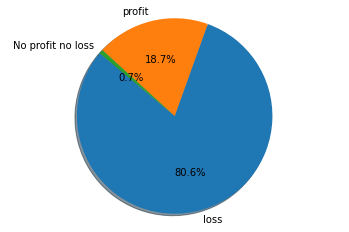

In [ ]:
labels = ['loss', 'profit', 'No profit no loss']
sizes = [A, B, C]
# Plot
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [ ]:
Discount=data.iloc[:,10:11]*100
Discount

,Discount
0,0.0
1,0.0
2,0.0
3,45.0
4,20.0
...,...
9989,20.0
9990,0.0
9991,20.0
9992,0.0


In [ ]:
Discount.min()

Discount    0.0
dtype: float64

In [ ]:
Discount.max()

Discount    80.0
dtype: float64

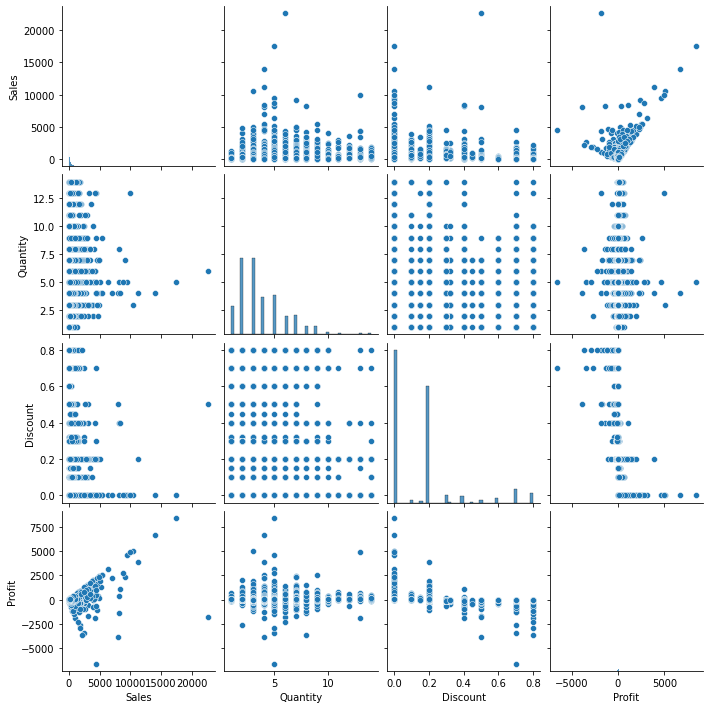

In [ ]:
sns.pairplot(data)

# **SCATTER PLOT**

**scatter plot sales vs profit**

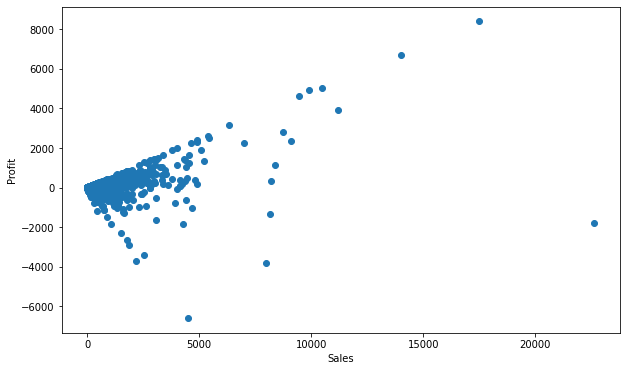

In [ ]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(data["Sales"] ,data["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

# **Distribution Plot**

count     9977.000000
mean       230.148902
std        623.721409
min          0.444000
25%         17.300000
50%         54.816000
75%        209.970000
max      22638.480000
Name: Sales, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



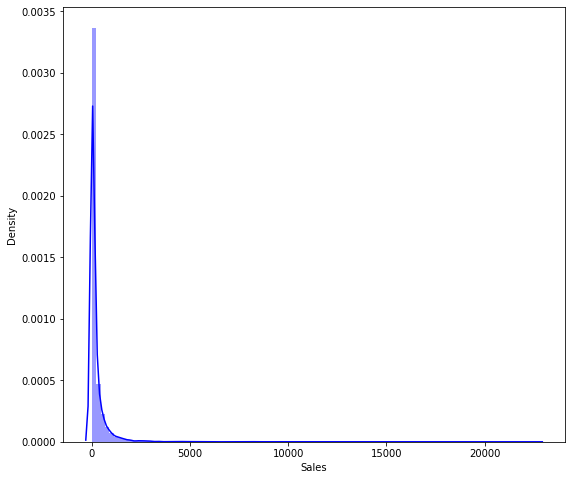

In [ ]:
print(data['Sales'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(data['Sales'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4});

